In [1]:
%pylab inline
import pandas as pd
import uproot
import awkward as ak
from yahist import Hist1D
from yahist.utils import plot_stack
import mplhep as hep
plt.style.use([hep.style.CMS, hep.style.firamath])

Populating the interactive namespace from numpy and matplotlib


In [2]:
t_balaji = uproot.open("../new4_run2.root")["t"]
df_balaji = t_balaji.arrays(library="pd")

In [3]:
df_franny = pd.read_pickle("/home/users/fsetti/HH2ggtautau/HggAnalysisDev/MVAs/out_zipped/bdt.pkl")

In [4]:
df_balaji = df_balaji.loc[(df_balaji["process_id"] > 0) | (df_balaji["process_id"] > -4)]
df_franny = df_franny.loc[(df_franny["process_id"] > 0) | (df_franny["process_id"] > -4)]

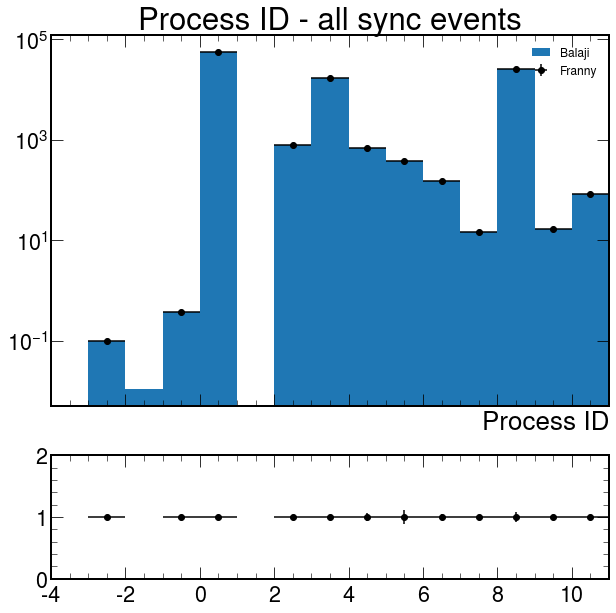

In [5]:
mgg_binning = "15,-4,11" # ROOT convention


balaji_toFill = df_balaji["process_id"] # select by process, then select the quantity
franny_toFill = df_franny["process_id"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning, weights=df_balaji["weight"])
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning, weights=df_franny["weight"])

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Process ID")
plt.title("Process ID - all sync events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)
#plt.savefig("mgg.pdf")

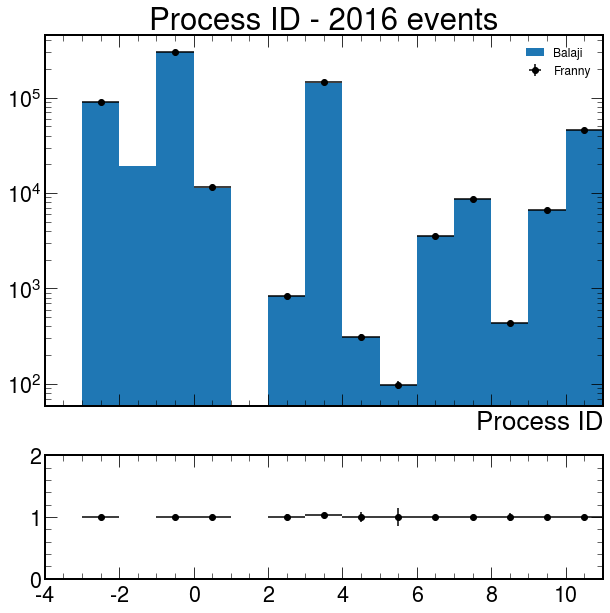

In [6]:
mgg_binning = "15,-4,11" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["year"] == 2016, "process_id"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["year"] == 2016, "process_id"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Process ID")
plt.title("Process ID - 2016 events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)
#plt.savefig("mgg.pdf")

In [72]:
df_balaji.loc[df_balaji["process_id"] == 9].groupby("year").count()

,phi_tautau_SVFit,eta_bdt_tautau_SVFit,eta_tautau_SVFit,gg_tt_hel_vis,lep12_dR,pt_tautau_SVFit,lep12_deta,MET_dil_dphi,eta_tautau_vis,m_tautau_vis,...,gg_eta,jet2_bTag,lep12_dphi,jet2_id,n_isoTrk,lep1_tightID,n_electrons,n_taus,lep1_eta,lep1_pt
year,,,,,,,,,,,,,,,,,,,,,
2016.0,6657,6657,6657,6657,6657,6657,6657,6657,6657,6657,...,6657,6657,6657,6657,6657,6657,6657,6657,6657,6657
2017.0,15094,15094,15094,15094,15094,15094,15094,15094,15094,15094,...,15094,15094,15094,15094,15094,15094,15094,15094,15094,15094
2018.0,13737,13737,13737,13737,13737,13737,13737,13737,13737,13737,...,13737,13737,13737,13737,13737,13737,13737,13737,13737,13737


In [71]:
df_franny.loc[df_franny["process_id"] == 9].groupby("year").count()

,run,lumiBlock,event,process_id,MET_pt,MET_phi,weight,Category,cat1,cat2,...,dPhi_ggtautau_SVFit,tt_hel,tt_hel_phys,m_tautau_vis,pt_tautau_vis,eta_tautau_vis,eta_tautau_vis_bdt,phi_tautau_vis,train_label,mva_score
year,,,,,,,,,,,,,,,,,,,,,
2016.0,6657,6657,6657,6657,6657,6657,6657,6657,6657,6657,...,6657,6657,6657,6657,6657,6657,6657,6657,6657,6657
2017.0,15094,15094,15094,15094,15094,15094,15094,15094,15094,15094,...,15094,15094,15094,15094,15094,15094,15094,15094,15094,15094
2018.0,13737,13737,13737,13737,13737,13737,13737,13737,13737,13737,...,13737,13737,13737,13737,13737,13737,13737,13737,13737,13737


In [9]:
(7.40 - 7.29)/7.29

0.01508916323731143

In [10]:
df_balaji.loc[df_balaji["process_id"] == 0].groupby("year").count()

,phi_tautau_SVFit,eta_bdt_tautau_SVFit,eta_tautau_SVFit,gg_tt_hel_vis,lep12_dR,pt_tautau_SVFit,lep12_deta,MET_dil_dphi,eta_tautau_vis,m_tautau_vis,...,gg_eta,jet2_bTag,lep12_dphi,jet2_id,n_isoTrk,lep1_tightID,n_electrons,n_taus,lep1_eta,lep1_pt
year,,,,,,,,,,,,,,,,,,,,,
2016.0,11433,11433,11433,11433,11433,11433,11433,11433,11433,11433,...,11433,11433,11433,11433,11433,11433,11433,11433,11433,11433
2017.0,17612,17612,17612,17612,17612,17612,17612,17612,17612,17612,...,17612,17612,17612,17612,17612,17612,17612,17612,17612,17612
2018.0,26348,26348,26348,26348,26348,26348,26348,26348,26348,26348,...,26348,26348,26348,26348,26348,26348,26348,26348,26348,26348


In [11]:
df_franny.loc[df_franny["process_id"] ==-1].groupby("year").count()

,run,lumiBlock,event,process_id,MET_pt,MET_phi,weight,Category,cat1,cat2,...,dPhi_ggtautau_SVFit,tt_hel,tt_hel_phys,m_tautau_vis,pt_tautau_vis,eta_tautau_vis,eta_tautau_vis_bdt,phi_tautau_vis,train_label,mva_score
year,,,,,,,,,,,,,,,,,,,,,
2016.0,300819,300819,300819,300819,300819,300819,300819,300819,300819,300819,...,300819,300819,300819,300819,300819,300819,300819,300819,300819,300819
2017.0,316298,316298,316298,316298,316298,316298,316298,316298,316298,316298,...,316298,316298,316298,316298,316298,316298,316298,316298,316298,316298
2018.0,305064,305064,305064,305064,305064,305064,305064,305064,305064,305064,...,305064,305064,305064,305064,305064,305064,305064,305064,305064,305064


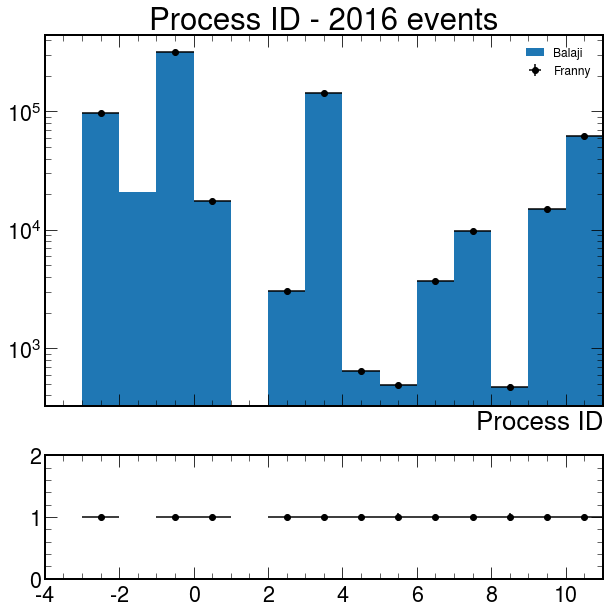

In [12]:
mgg_binning = "15,-4,11" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["year"] == 2017, "process_id"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["year"] == 2017, "process_id"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Process ID")
plt.title("Process ID - 2016 events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)
#plt.savefig("mgg.pdf")

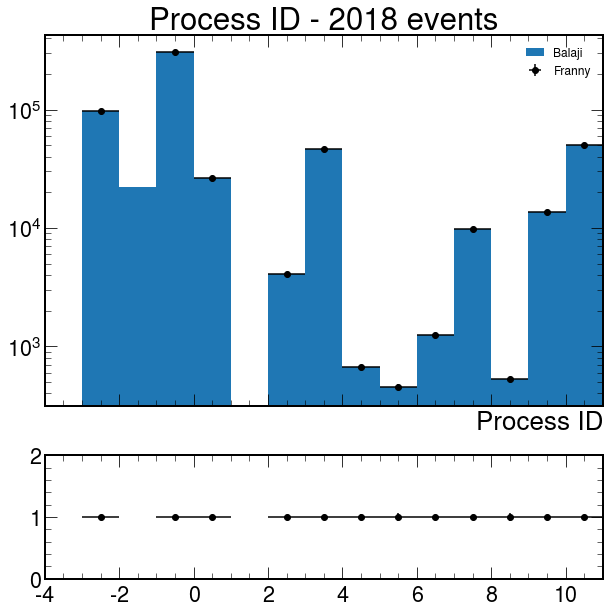

In [13]:
mgg_binning = "15,-4,11" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["year"] == 2018, "process_id"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["year"] == 2018, "process_id"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Process ID")
plt.title("Process ID - 2018 events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)
#plt.savefig("mgg.pdf")

In [14]:
sum(balaji_toFill == 9), sum(franny_toFill == 9)

(13737, 13737)

In [15]:
sum(df_balaji.loc[df_balaji["process_id"] == 9, "weight"]), sum(df_franny.loc[df_franny["process_id"] == 9, "weight"])

(17.041245, 17.041243261657655)

In [16]:
(17.04 - 16.77)/16.77

0.01610017889087654

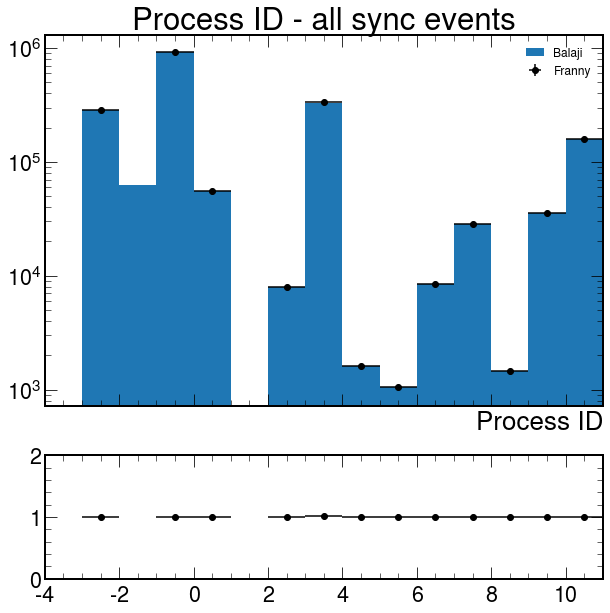

In [17]:
mgg_binning = "15,-4,11" # ROOT convention


balaji_toFill = df_balaji["process_id"] # select by process, then select the quantity
franny_toFill = df_franny["process_id"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Process ID")
plt.title("Process ID - all sync events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


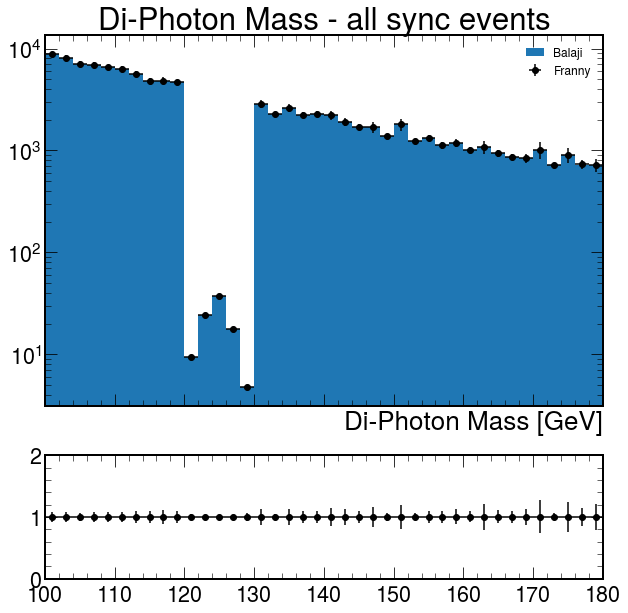

In [18]:
mgg_binning = "40,100,180" # ROOT convention


balaji_toFill = df_balaji["mgg"] # select by process, then select the quantity
franny_toFill = df_franny["mgg"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning, weights=df_balaji["weight"])
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning, weights=df_franny["weight"])

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Di-Photon Mass [GeV]")
plt.title("Di-Photon Mass - all sync events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)
plt.savefig("mgg.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


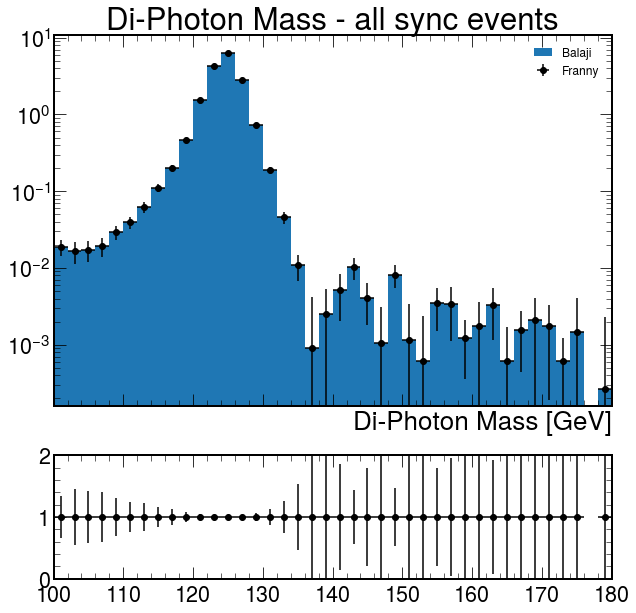

In [19]:
mgg_binning = "40,100,180" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["process_id"] == 9, "mgg"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["process_id"] == 9, "mgg"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning, weights=df_balaji.loc[df_balaji["process_id"] == 9, "weight"])
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning, weights=df_franny.loc[df_franny["process_id"] == 9, "weight"])

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Di-Photon Mass [GeV]")
plt.title("Di-Photon Mass - all sync events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)
plt.savefig("mgg.pdf")

In [20]:
balaji_hist.integral, franny_hist.integral

(17.04124318435788, 17.041243261657655)

In [21]:
abs(balaji_hist.integral - franny_hist.integral)/min(balaji_hist.integral, franny_hist.integral)

4.5360407604556695e-09

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


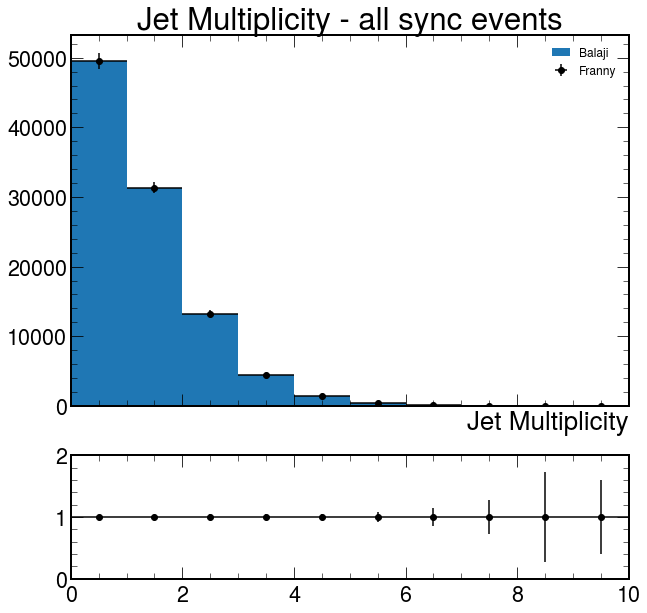

In [22]:
mgg_binning = "10,0,10" # ROOT convention


balaji_toFill = df_balaji["n_jets"] # select by process, then select the quantity
franny_toFill = df_franny["n_jets"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning, weights=df_balaji["weight"])
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning, weights=df_franny["weight"])

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)

ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Jet Multiplicity")
plt.title("Jet Multiplicity - all sync events")
ax1.legend(fontsize=12)
plt.savefig("n_jet.pdf")

### Concerning distribution!!

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


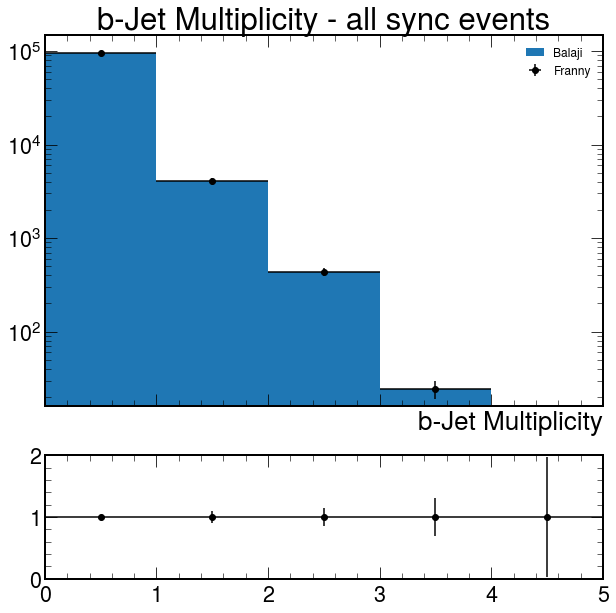

In [23]:
mgg_binning = "5,0,5" # ROOT convention


balaji_toFill = df_balaji["n_bjets"] # select by process, then select the quantity
franny_toFill = df_franny["n_bjets"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning, weights=df_balaji["weight"])
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning, weights=df_franny["weight"])

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)

ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("b-Jet Multiplicity")
plt.title("b-Jet Multiplicity - all sync events")
ax1.legend(fontsize=12)
plt.savefig("n_bjet.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


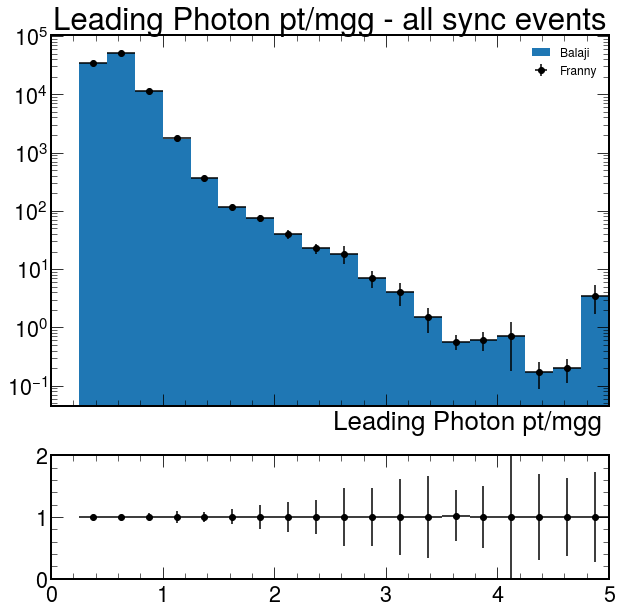

In [24]:
mgg_binning = "20,0,5" # ROOT convention


balaji_toFill = df_balaji["g1_ptmgg"] # select by process, then select the quantity
franny_toFill = df_franny["g1_ptmgg"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning, weights=df_balaji["weight"])
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning, weights=df_franny["weight"])

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Photon pt/mgg ")
plt.title("Leading Photon pt/mgg - all sync events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)
plt.savefig("g1_ptmgg.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


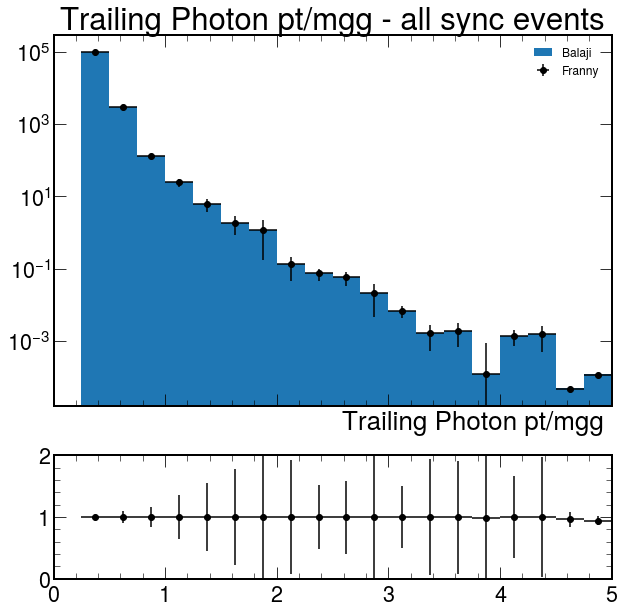

In [25]:
mgg_binning = "20,0,5" # ROOT convention


balaji_toFill = df_balaji["g2_ptmgg"] # select by process, then select the quantity
franny_toFill = df_franny["g2_ptmgg"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning, weights=df_balaji["weight"])
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning, weights=df_franny["weight"])

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Photon pt/mgg ")
plt.title("Trailing Photon pt/mgg - all sync events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)
plt.savefig("g2_ptmgg.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


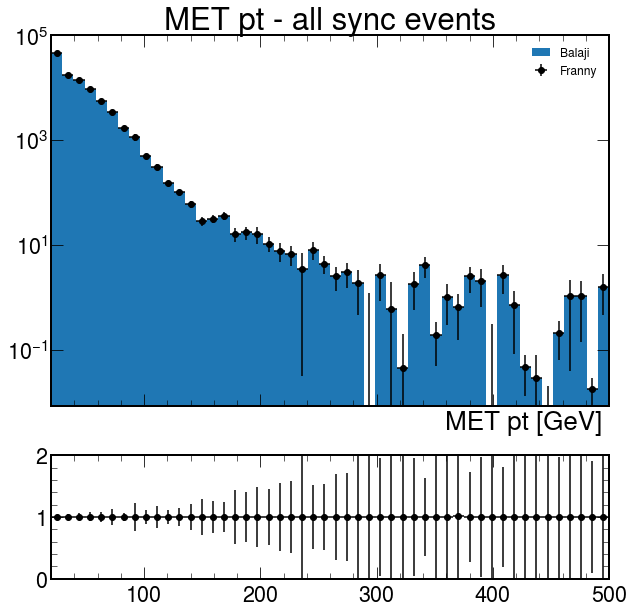

In [26]:
mgg_binning = "50,20,500" # ROOT convention


balaji_toFill = df_balaji["MET_pt"] # select by process, then select the quantity
franny_toFill = df_franny["MET_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning, weights=df_balaji["weight"])
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning, weights=df_franny["weight"])

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("MET pt [GeV] ")
plt.title("MET pt - all sync events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)
plt.savefig("MET_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


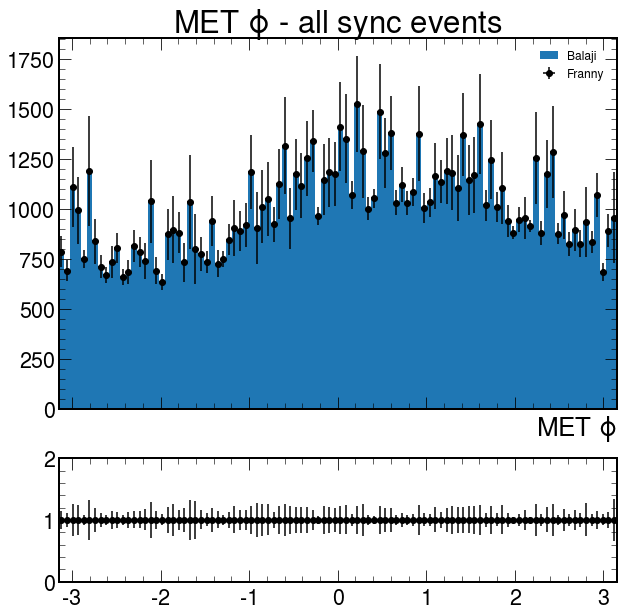

In [27]:
mgg_binning = "100,-3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji["MET_phi"] # select by process, then select the quantity
franny_toFill = df_franny["MET_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning, weights=df_balaji["weight"])
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning, weights=df_franny["weight"])

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("MET $\phi$")
plt.title("MET $\phi$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("MET_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


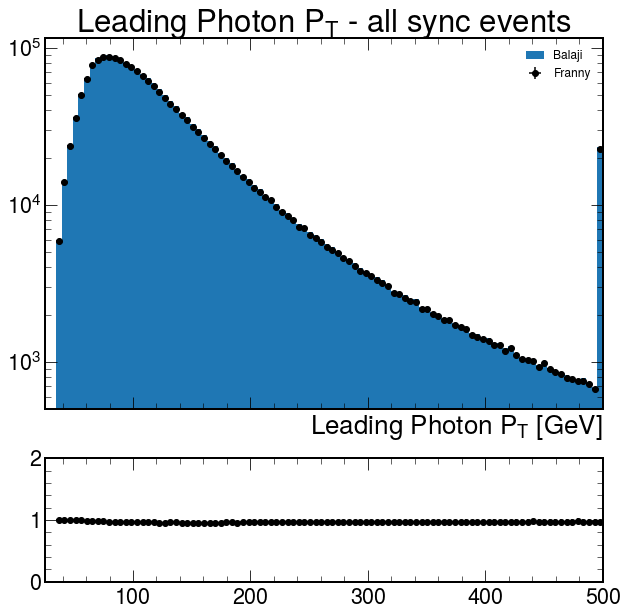

In [28]:
mgg_binning = "100, 25, 500" # ROOT convention


balaji_toFill = df_balaji["g1_pt"] # select by process, then select the quantity
franny_toFill = df_franny["g1_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Leading Photon $P_T$ [GeV]")
plt.title("Leading Photon $P_T$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g1_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


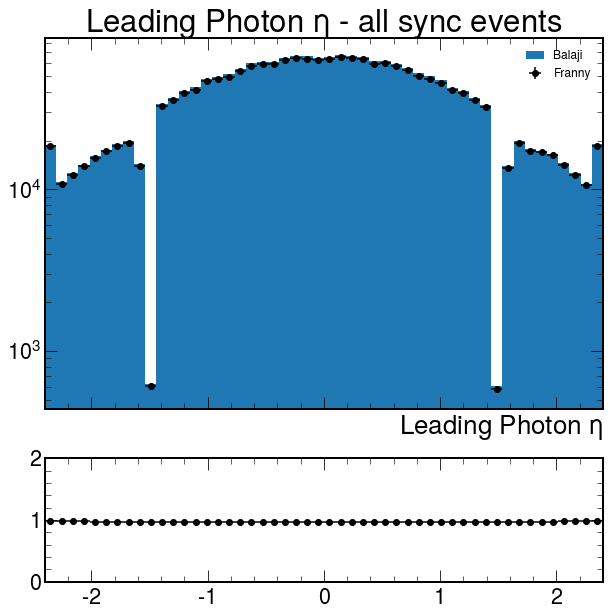

In [29]:
mgg_binning = "50, -2.4, 2.4" # ROOT convention


balaji_toFill = df_balaji["g1_eta"] # select by process, then select the quantity
franny_toFill = df_franny["g1_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Leading Photon $\eta$")
plt.title("Leading Photon $\eta$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g1_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


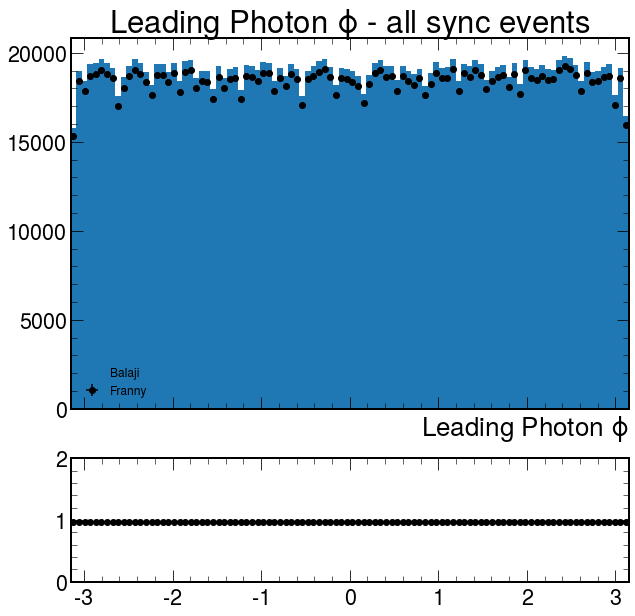

In [30]:
mgg_binning = "100,-3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji["g1_phi"] # select by process, then select the quantity
franny_toFill = df_franny["g1_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Photon $\phi$")
plt.title("Leading Photon $\phi$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g1_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


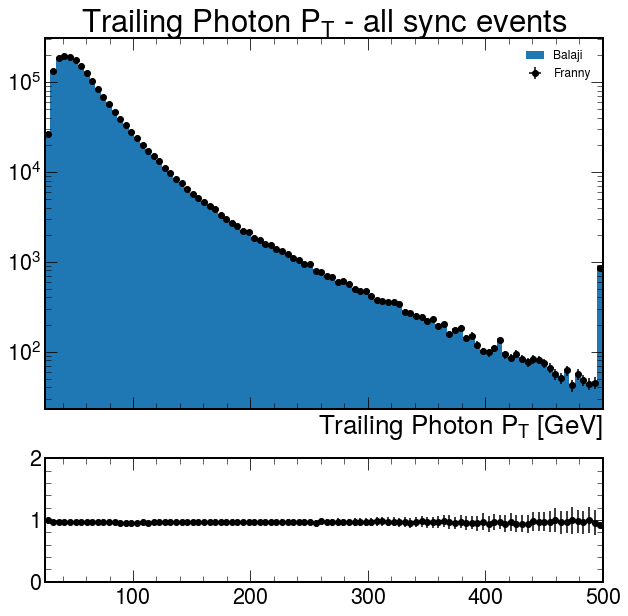

In [31]:
mgg_binning = "100, 25, 500" # ROOT convention


balaji_toFill = df_balaji["g2_pt"] # select by process, then select the quantity
franny_toFill = df_franny["g2_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Trailing Photon $P_T$ [GeV]")
plt.title("Trailing Photon $P_T$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g2_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


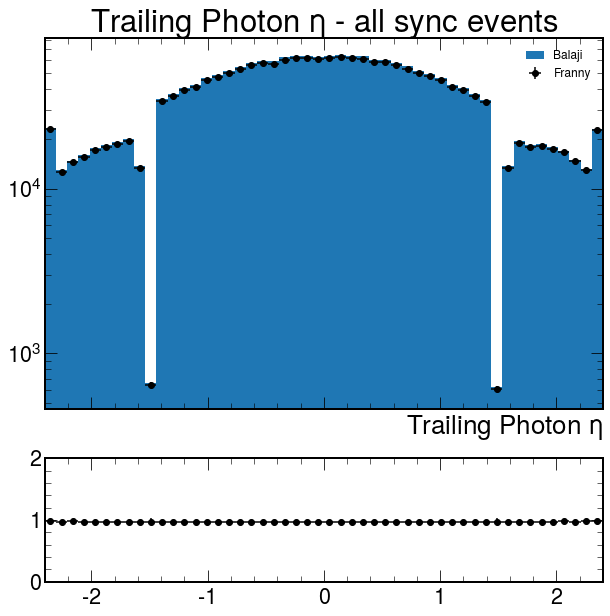

In [32]:
mgg_binning = "50, -2.4, 2.4" # ROOT convention


balaji_toFill = df_balaji["g2_eta"] # select by process, then select the quantity
franny_toFill = df_franny["g2_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Trailing Photon $\eta$")
plt.title("Trailing Photon $\eta$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g2_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


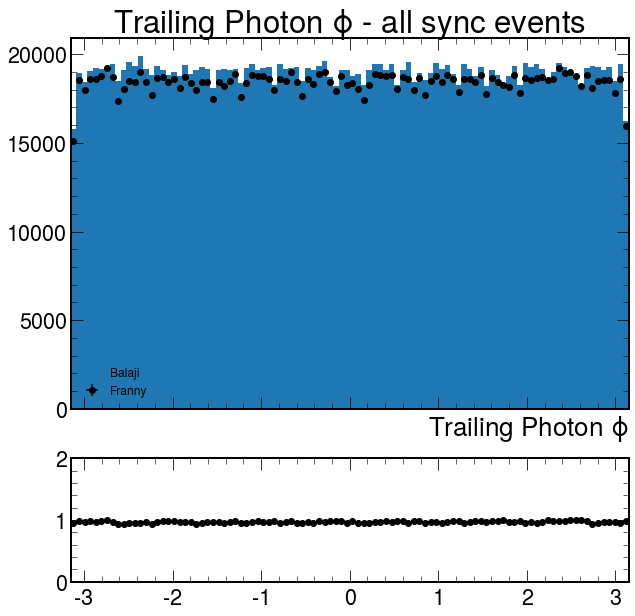

In [33]:
mgg_binning = "100,-3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji["g2_phi"] # select by process, then select the quantity
franny_toFill = df_franny["g2_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Photon $\phi$")
plt.title("Trailing Photon $\phi$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g2_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


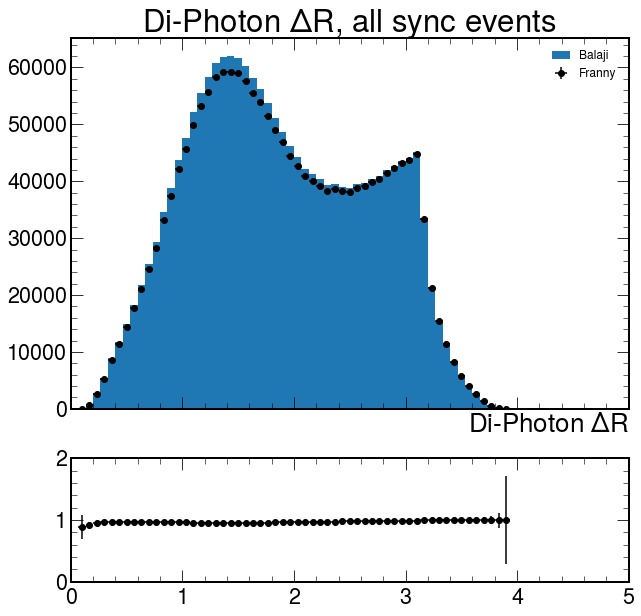

In [34]:
mgg_binning = "75,0,5" # ROOT convention


balaji_toFill = df_balaji["gg_dR"] # select by process, then select the quantity
franny_toFill = df_franny["gg_dR"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Di-Photon $\Delta$R")
plt.title("Di-Photon $\Delta$R, all sync events")
ax1.legend(fontsize=12)
plt.savefig("g2_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


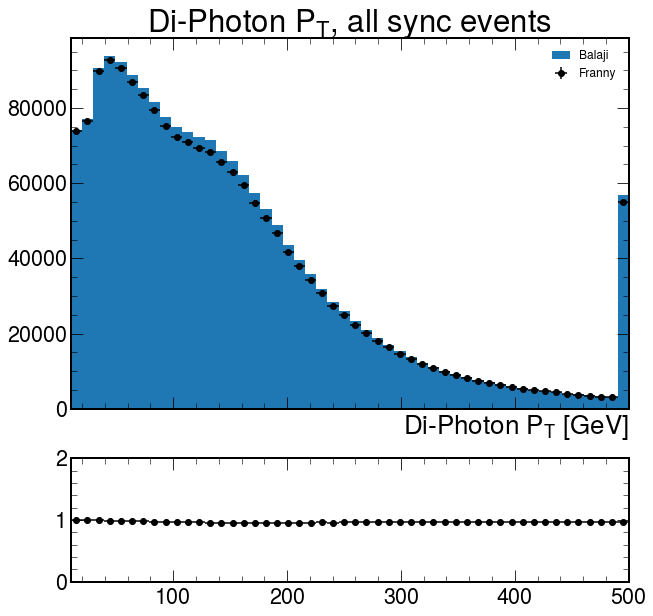

In [73]:
mgg_binning = "50,10,500" # ROOT convention


balaji_toFill = df_balaji["gg_pt"] # select by process, then select the quantity
franny_toFill = df_franny["gg_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Di-Photon $P_T$ [GeV]")
plt.title("Di-Photon $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("gg_dR.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


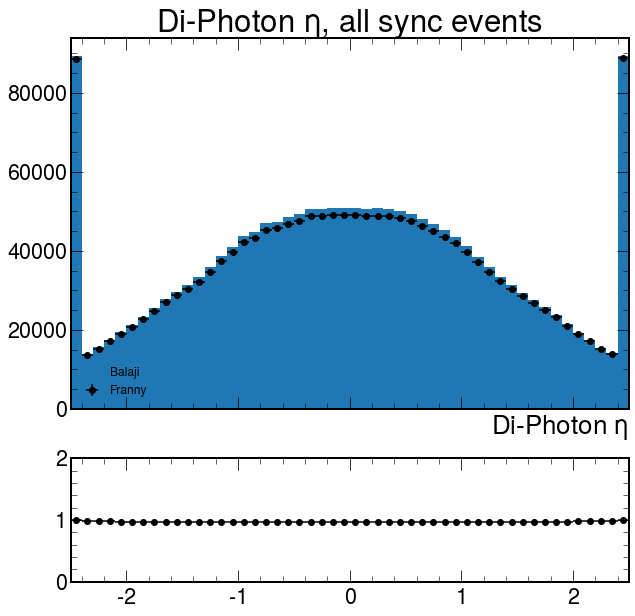

In [36]:
mgg_binning = "50,-2.5,2.5" # ROOT convention


balaji_toFill = df_balaji["gg_eta"] # select by process, then select the quantity
franny_toFill = df_franny["gg_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Di-Photon $\eta$")
plt.title("Di-Photon $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("gg_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


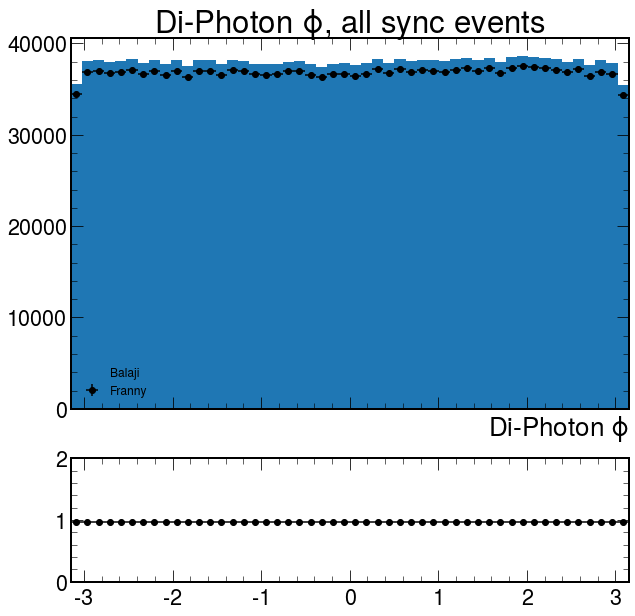

In [37]:
mgg_binning = "50,-3.15,3.15" # ROOT convention


balaji_toFill = df_balaji["gg_phi"] # select by process, then select the quantity
franny_toFill = df_franny["gg_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Di-Photon $\phi$")
plt.title("Di-Photon $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("gg_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


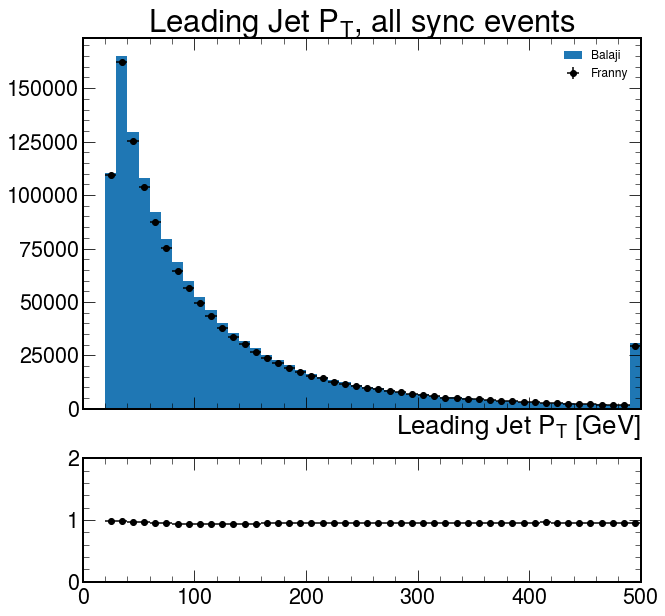

In [38]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["jet1_pt"] > 0, "jet1_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["jet1_pt"] > 0, "jet1_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Jet $P_T$ [GeV]")
plt.title("Leading Jet $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("gg_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


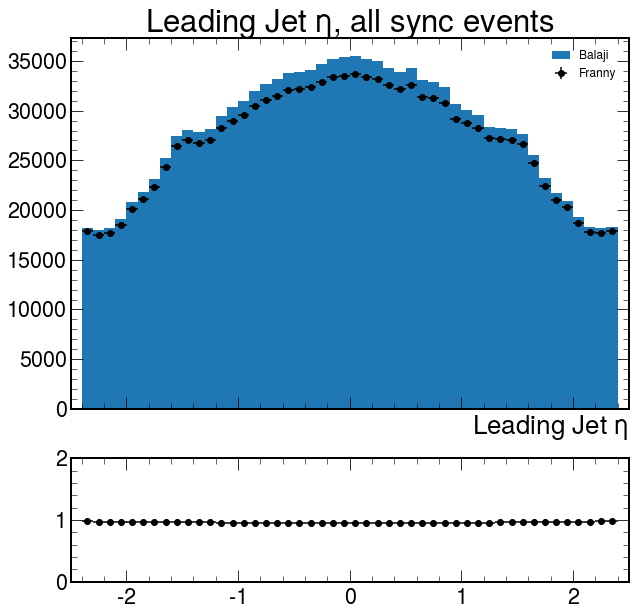

In [39]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["jet1_pt"] > 0, "jet1_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["jet1_pt"] > 0, "jet1_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Jet $\eta$")
plt.title("Leading Jet $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("jet1_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


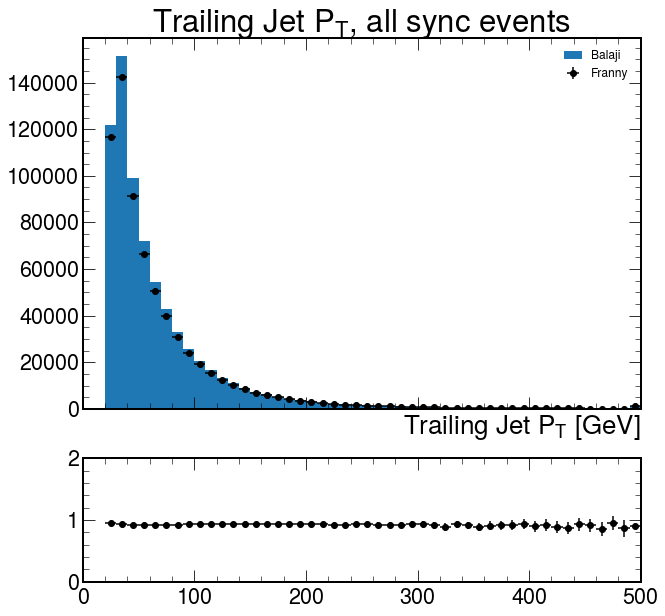

In [40]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["jet2_pt"] > 0, "jet2_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["jet2_pt"] > 0, "jet2_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Jet $P_T$ [GeV]")
plt.title("Trailing Jet $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("jet1_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


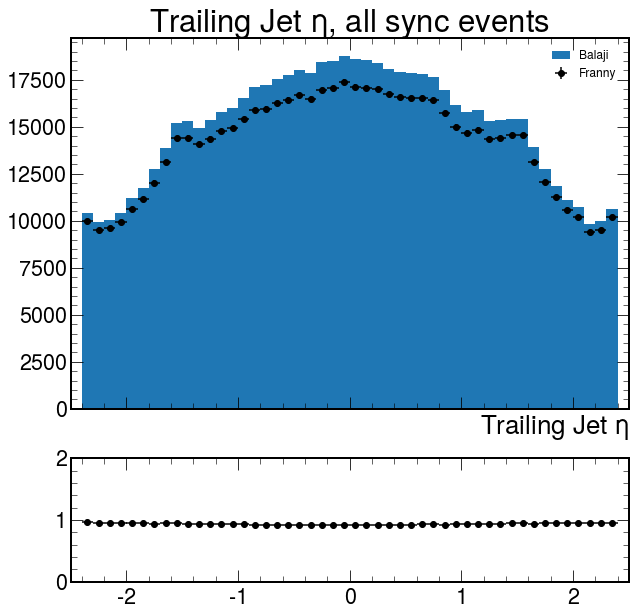

In [41]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["jet2_pt"] > 0, "jet2_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["jet2_pt"] > 0, "jet2_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Jet $\eta$")
plt.title("Trailing Jet $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("jet2_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


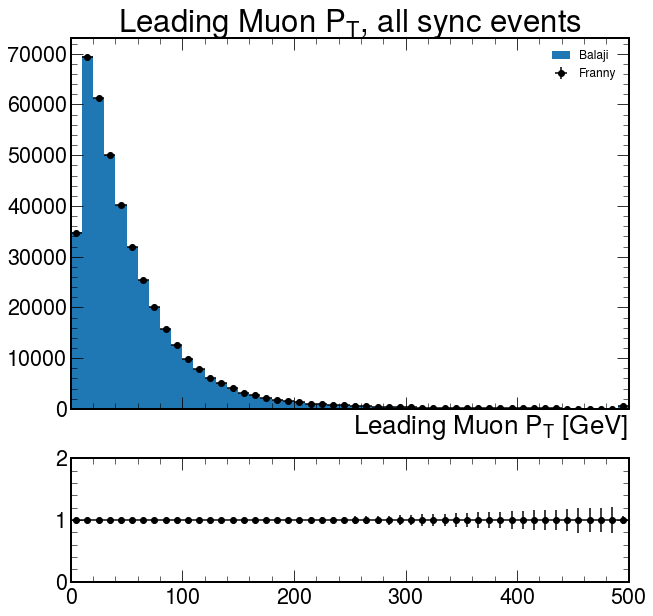

In [43]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgID"]) == 13, "lep1_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 13 , "lep1_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Muon $P_T$ [GeV]")
plt.title("Leading Muon $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("jet2_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


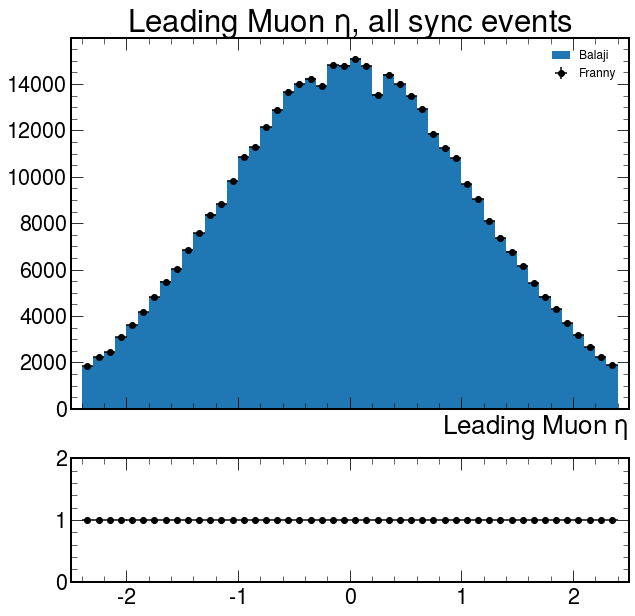

In [44]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgID"]) == 13, "lep1_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 13 , "lep1_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Muon $\eta$")
plt.title("Leading Muon $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("muon1_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


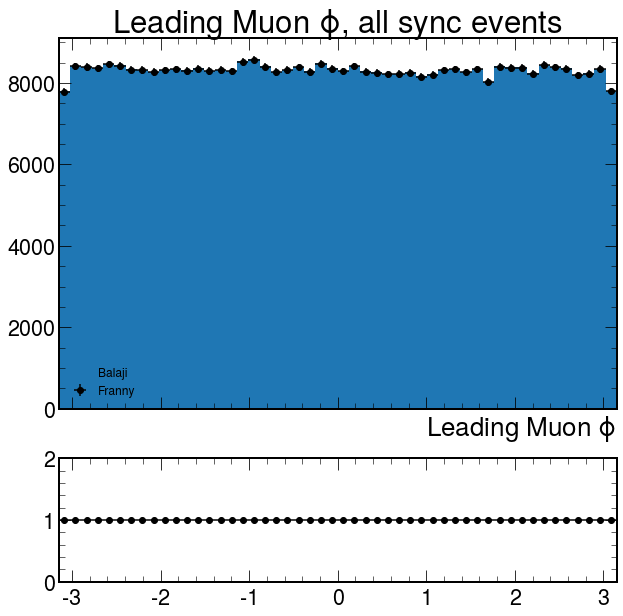

In [45]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgID"]) == 13, "lep1_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 13 , "lep1_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Muon $\phi$")
plt.title("Leading Muon $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("muon1_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


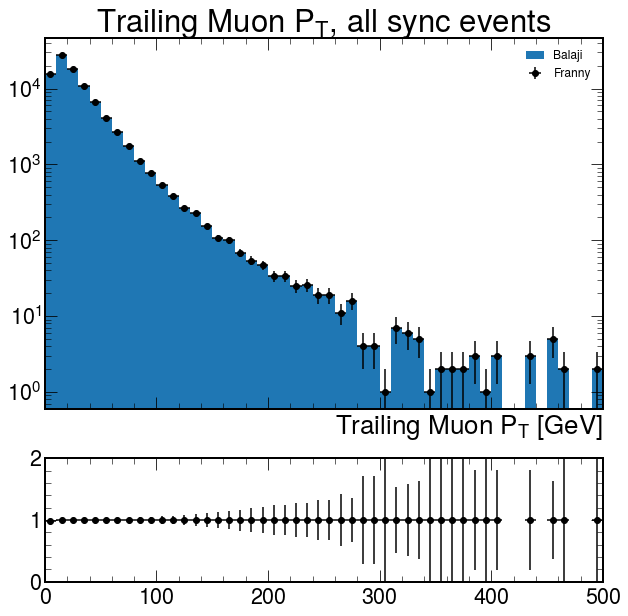

In [46]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgID"]) == 13, "lep2_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 13 , "lep2_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Trailing Muon $P_T$ [GeV]")
plt.title("Trailing Muon $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("muon1_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


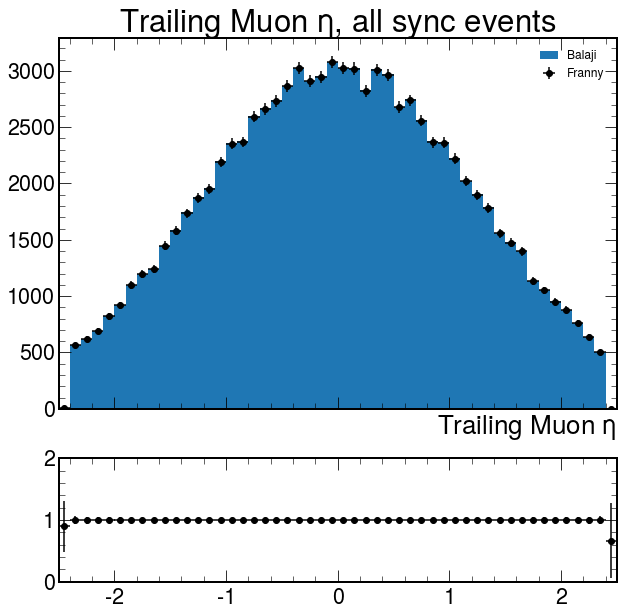

In [47]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgID"]) == 13, "lep2_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 13 , "lep2_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Muon $\eta$")
plt.title("Trailing Muon $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("muon2_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


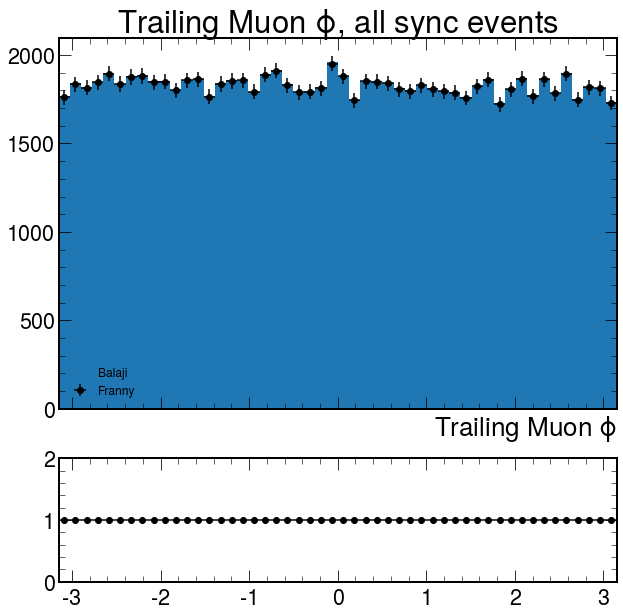

In [48]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgID"]) == 13, "lep2_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 13 , "lep2_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Muon $\phi$")
plt.title("Trailing Muon $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("muon2_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


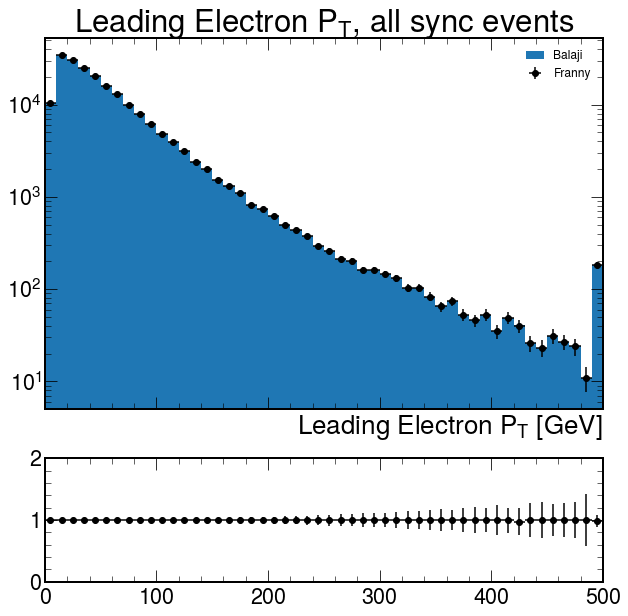

In [49]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgID"]) == 11, "lep1_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 11 , "lep1_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Leading Electron $P_T$ [GeV]")
plt.title("Leading Electron $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele1_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


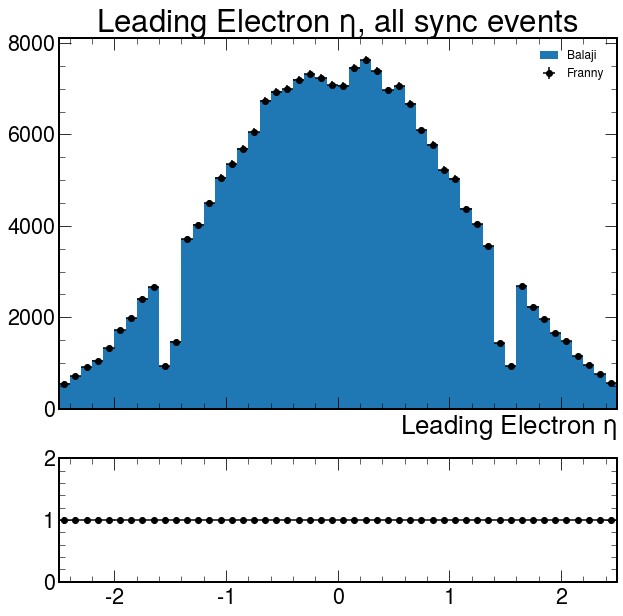

In [50]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgID"]) == 11, "lep1_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 11 , "lep1_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Electron $\eta$")
plt.title("Leading Electron $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele1_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


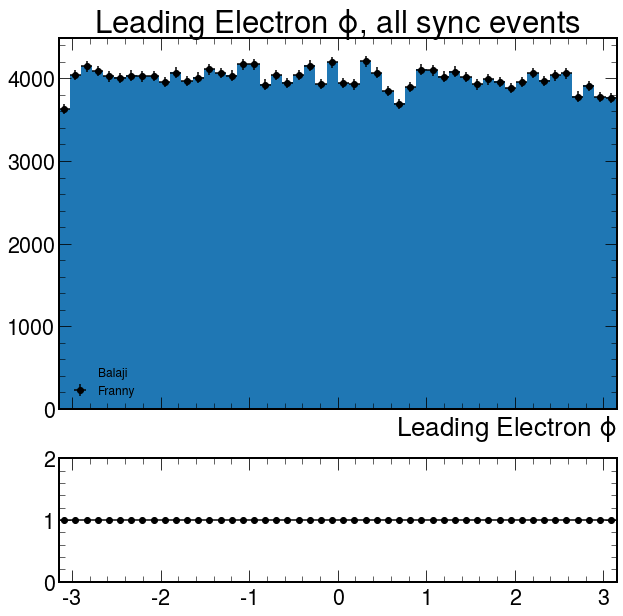

In [51]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgID"]) == 11, "lep1_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 11 , "lep1_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Electron $\phi$")
plt.title("Leading Electron $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele1_phi.pdf")

In [ ]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 11, "lep2_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 11 , "lep2_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Trailing Electron $P_T$ [GeV]")
plt.title("Trailing Electron $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele2_pt.pdf")

In [ ]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 11, "lep2_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 11 , "lep2_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Electron $\eta$")
plt.title("Trailing Electron $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele2_eta.pdf")

In [ ]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 11, "lep2_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 11 , "lep2_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Electron $\phi$")
plt.title("Trailing Electron $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele2_phi.pdf")

In [ ]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 15, "lep1_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 15 , "lep1_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Leading Tau $P_T$ [GeV]")
plt.title("Leading Tau $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau1_pt.pdf")

In [ ]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 15, "lep1_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 15 , "lep1_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Tau $\eta$")
plt.title("Leading Tau $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau1_eta.pdf")

In [ ]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 15, "lep1_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 15 , "lep1_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Tau $\phi$")
plt.title("Leading Tau $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau1_phi.pdf")

In [ ]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 15, "lep2_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 15 , "lep2_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Trailing Tau $P_T$ [GeV]")
plt.title("Trailing Tau $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau2_pt.pdf")

In [ ]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 15, "lep2_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 15 , "lep2_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Tau $\eta$")
plt.title("Trailing Tau $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau2_eta.pdf")

In [ ]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 15, "lep2_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 15 , "lep2_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Tau $\phi$")
plt.title("Trailing Tau $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau2_phi.pdf")

In [ ]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji["m_tautau_vis"] # select by process, then select the quantity
franny_toFill = df_franny["m_tautau_vis"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Visible di-tau mass [GeV]")
plt.title("Visible di-tau mass, all sync events")
ax1.legend(fontsize=12)
plt.savefig("m_tautau_vis.pdf")

In [ ]:
mgg_binning = "50, 50, 400" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["Category"] <= 6, "m_tautau_SVFit"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["Category"] <= 6, "m_tautau_SVFit"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("SVFit di-tau mass [GeV]")
plt.title("SVFit di-tau mass, all sync events")
ax1.legend(fontsize=12)
plt.savefig("m_tautau_SVFit.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


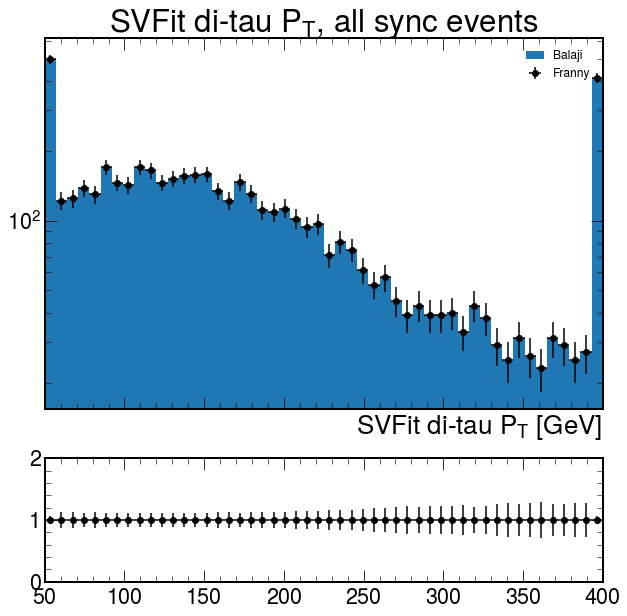

In [101]:
mgg_binning = "50, 50, 400" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["Category"] <= 6, "pt_tautau_SVFit"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["Category"] <= 6, "pt_tautau_SVFit"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("SVFit di-tau $P_T$ [GeV]")
plt.title("SVFit di-tau $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("pt_tautau_SVFit.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


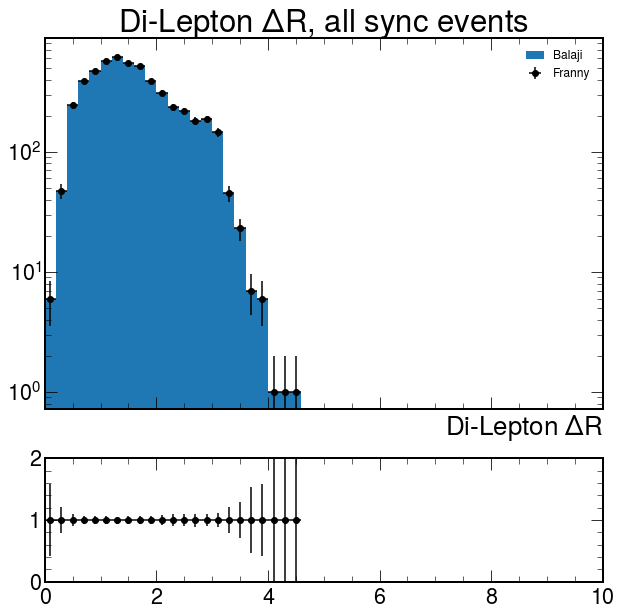

In [102]:
mgg_binning = "50,0,10" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["Category"] <= 6, "lep12_dR"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["Category"] <= 6, "lep12_dr"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Di-Lepton $\Delta$R")
plt.title("Di-Lepton $\Delta$R, all sync events")
ax1.legend(fontsize=12)
plt.savefig("lep12_dR.pdf")

### The "not-so-nice" ones

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


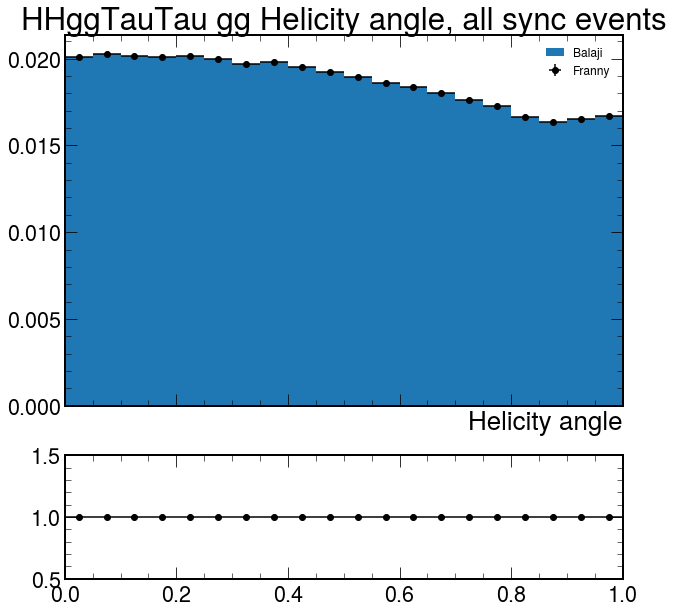

In [70]:
mgg_binning = "20,0.0,1.0" # ROOT convention


balaji_toFill = abs(df_balaji.loc[df_balaji["process_id"] == -1, "gg_cosTheta_helicity_flashgg"]) # select by process, then select the quantity
franny_toFill = abs(df_franny.loc[df_franny["process_id"] == -1, "gg_hel"])

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning, weights=df_balaji.loc[df_balaji["process_id"] == -1, "weight"])
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning, weights=df_franny.loc[df_franny["process_id"] == -1, "weight"])

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0.5,1.5])
plt.sca(ax1)
#plt.yscale("log")
plt.xlabel("Helicity angle")
plt.title("HHggTauTau gg Helicity angle, all sync events")
ax1.legend(fontsize=12)
plt.savefig("gg_helicity_HH.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


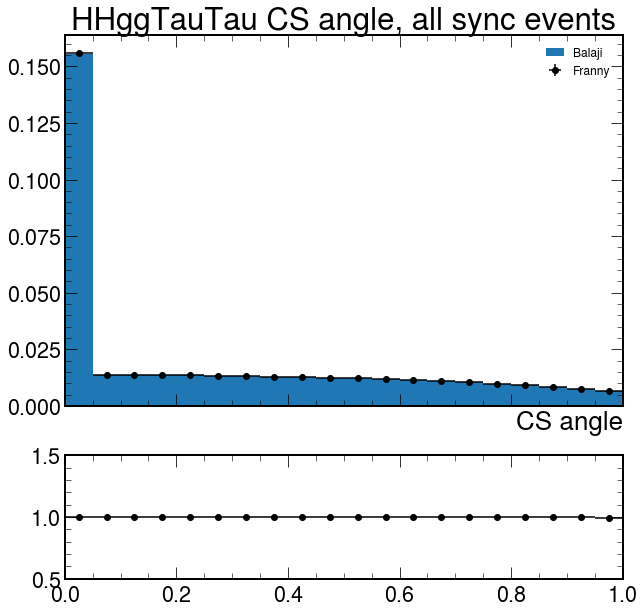

In [69]:
mgg_binning = "20,0.0,1.0" # ROOT convention


balaji_toFill = (df_balaji.loc[df_balaji["process_id"] == -1, "gg_tt_CS"]) # select by process, then select the quantity
franny_toFill = (df_franny.loc[df_franny["process_id"] == -1, "gg_tt_CS"])

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning, weights=df_balaji.loc[df_balaji["process_id"] == -1, "weight"])
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning, weights=df_franny.loc[df_franny["process_id"] == -1, "weight"])

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0.5,1.5])
plt.sca(ax1)
#plt.yscale("log")
plt.xlabel("CS angle")
plt.title("HHggTauTau CS angle, all sync events")
ax1.legend(fontsize=12)
plt.savefig("CS_HH.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


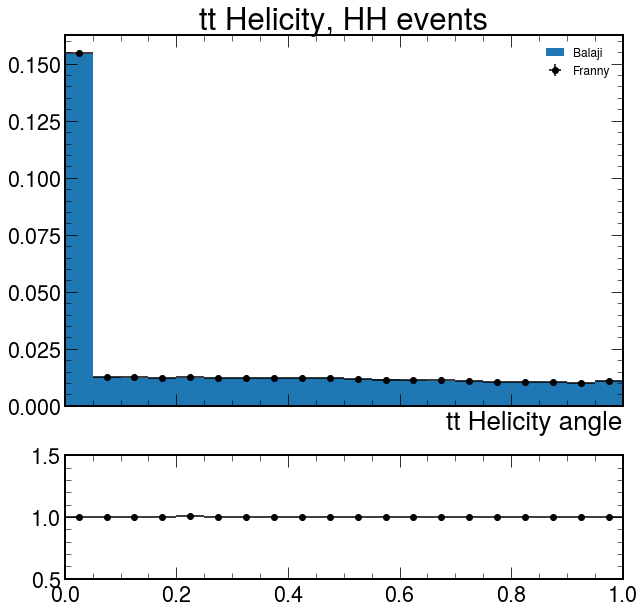

In [68]:
mgg_binning = "20,0.0,1.0" # ROOT convention


balaji_toFill = (df_balaji.loc[df_balaji["process_id"] == -1, "tt_hel"]) # select by process, then select the quantity
franny_toFill = (df_franny.loc[df_franny["process_id"] == -1, "tt_hel"])

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning, weights=df_balaji.loc[df_balaji["process_id"] == -1, "weight"])
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning, weights=df_franny.loc[df_franny["process_id"] == -1, "weight"])

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0.5,1.5])
plt.sca(ax1)
#plt.yscale("log")
plt.xlabel("tt Helicity angle")
plt.title("tt Helicity, HH events")
ax1.legend(fontsize=12)
plt.savefig("tt_hel_HH.pdf")

In [61]:
[i for i in df_balaji.columns if "tt_hel" in i]

['gg_tt_hel_vis', 'tt_hel', 'gg_tt_hel', 'tt_hel_vis']

In [62]:
[i for i in df_franny.columns if "tt_hel" in i]

['gg_tt_hel', 'gg_tt_hel_phys', 'tt_hel', 'tt_hel_phys']

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


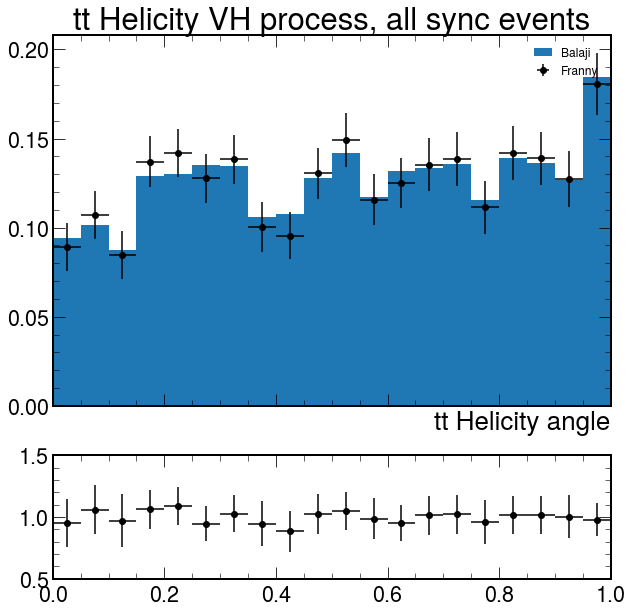

In [67]:
mgg_binning = "20,0.0,1.0" # ROOT convention


balaji_toFill = (df_balaji.loc[(df_balaji["Category"] < 8) & (df_balaji["process_id"] == 9), "tt_hel"]) # select by process, then select the quantity
franny_toFill = (df_franny.loc[(df_franny["Category"] < 8) & (df_franny["process_id"] == 9), "tt_hel"])

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning, weights=df_balaji.loc[(df_balaji["Category"] < 8) & (df_balaji["process_id"] == 9), "weight"])
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning, weights=df_franny.loc[(df_franny["Category"] < 8) & (df_franny["process_id"] == 9), "weight"])

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0.5,1.5])
plt.sca(ax1)
#plt.yscale("log")
plt.xlabel("tt Helicity angle")
plt.title("tt Helicity VH process, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tt_hel_HH.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


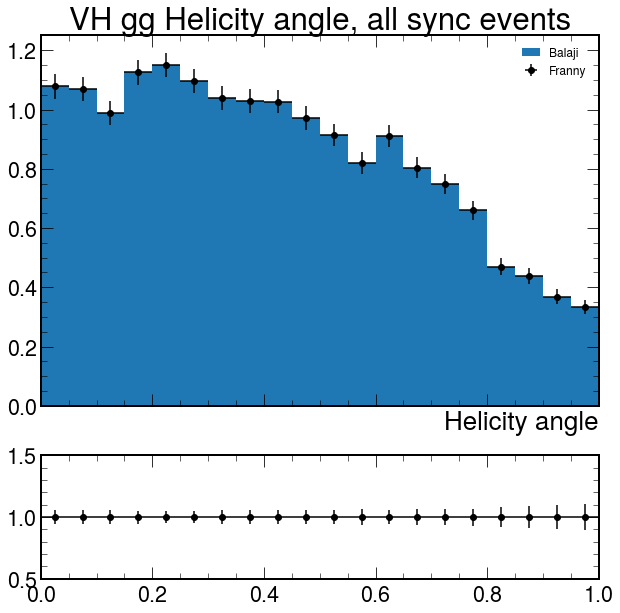

In [56]:
mgg_binning = "20,0,1.0" # ROOT convention


balaji_toFill = abs(df_balaji.loc[df_balaji["process_id"] == 9, "gg_cosTheta_helicity_flashgg"]) # select by process, then select the quantity
franny_toFill = abs(df_franny.loc[df_franny["process_id"] == 9, "gg_hel"])

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning, weights=df_balaji.loc[df_balaji["process_id"] == 9, "weight"])
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning, weights=df_franny.loc[df_franny["process_id"] == 9, "weight"])

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0.5,1.5])
plt.sca(ax1)
#plt.yscale("log")
plt.xlabel("Helicity angle")
plt.title("VH gg Helicity angle, all sync events")
ax1.legend(fontsize=12)
plt.savefig("gg_helicity_VH.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


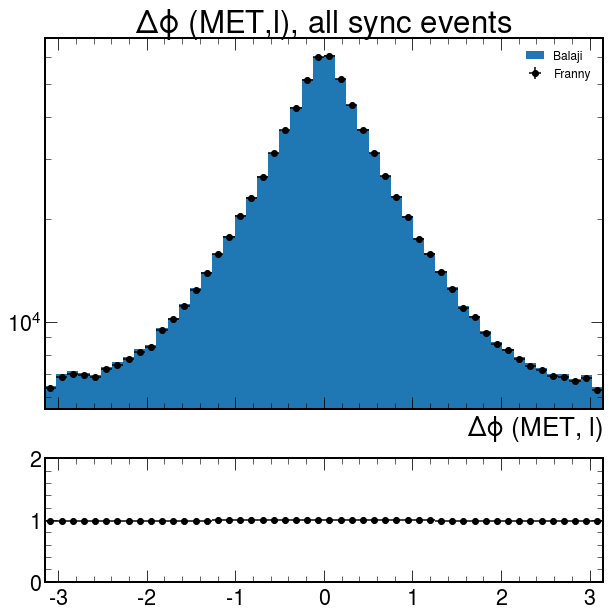

In [55]:
mgg_binning = "50,-3.15,3.15" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["Category"] < 8, "dPhi_MET_tau1"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["Category"] < 8, "dPhi_MET_l"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("$\Delta\phi$ (MET, l)")
plt.title("$\Delta\phi$ (MET,l), all sync events")
ax1.legend(fontsize=12)
plt.savefig("dphi_met_l.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


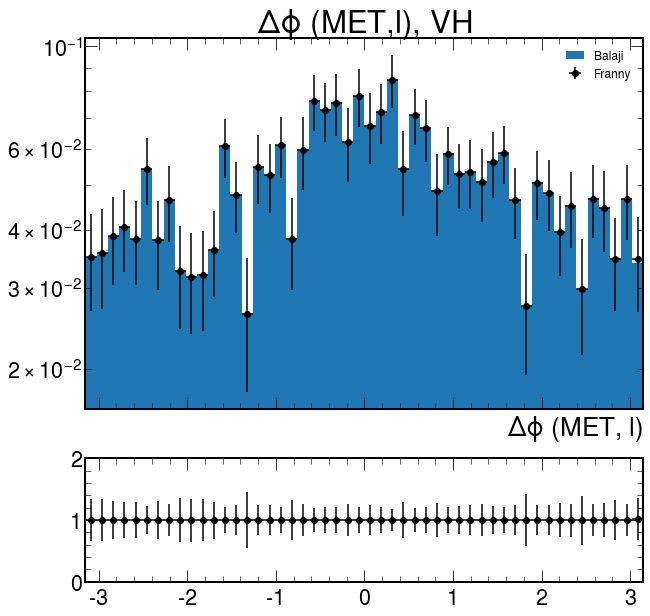

In [54]:
mgg_binning = "50,-3.15,3.15" # ROOT convention


balaji_toFill = df_balaji.loc[(df_balaji["Category"] < 8) & (df_balaji["process_id"] == 9), "dPhi_MET_tau1"] # select by process, then select the quantity
franny_toFill = df_franny.loc[(df_franny["Category"] < 8) & (df_franny["process_id"] == 9), "dPhi_MET_l"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning, weights=df_balaji.loc[(df_balaji["Category"] < 8) & (df_balaji["process_id"] == 9), "weight"])
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning, weights=df_franny.loc[(df_franny["Category"] < 8) & (df_franny["process_id"] == 9), "weight"])

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("$\Delta\phi$ (MET, l)")
plt.title("$\Delta\phi$ (MET,l), VH")
ax1.legend(fontsize=12)
plt.savefig("dphi_met_l_VH.pdf")

In [64]:
len(balaji_toFill), len(franny_toFill)

(5031, 5548)

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


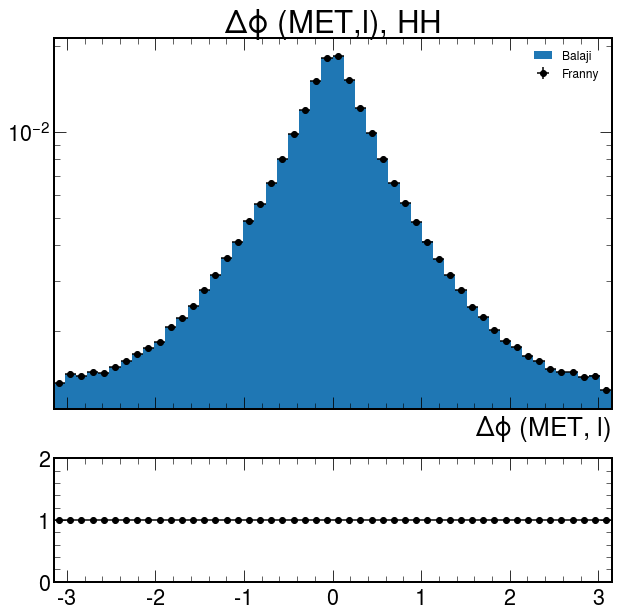

In [53]:
mgg_binning = "50,-3.15,3.15" # ROOT convention


balaji_toFill = df_balaji.loc[(df_balaji["Category"] < 8) & (df_balaji["process_id"] == -1), "dPhi_MET_tau1"] # select by process, then select the quantity
franny_toFill = df_franny.loc[(df_franny["Category"] < 8) & (df_franny["process_id"] == -1), "dPhi_MET_l"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning, weights=df_balaji.loc[(df_balaji["Category"] < 8) & (df_balaji["process_id"] == -1), "weight"])
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning, weights=df_franny.loc[(df_franny["Category"] < 8) & (df_franny["process_id"] == -1), "weight"])

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("$\Delta\phi$ (MET, l)")
plt.title("$\Delta\phi$ (MET,l), HH")
ax1.legend(fontsize=12)
plt.savefig("dphi_met_l_HH.pdf")